In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils import compute_trade_sign

events = pd.read_parquet("../fbd/data/clean/intraday/SPY.P_2010.parquet")
events.set_index("index",inplace=True)

## we may need to collapse trades with exactly the same (bid,ask,trade price) together to reduce computational load and make things easier
## often these trade are a result of one big trade being chunked

# available one liner to aggregate trades
#! events =  events.groupby(["bid","ask","trade.price"])["trade.volume"].aggregate(["idxmin","sum"]).reset_index().rename(columns={"sum":"trade.volume"})


events= compute_trade_sign(events)


Percentage of unclassifiable trades 13.71%


## Testing scipy.convolve and concordance with compute_R

In [107]:
from utils import compute_R_fast

In [108]:
%%timeit

R_05=compute_R_fast(events)


3.41 s ± 620 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
%time
R_05=compute_R(events)


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.34 µs


KeyboardInterrupt: 

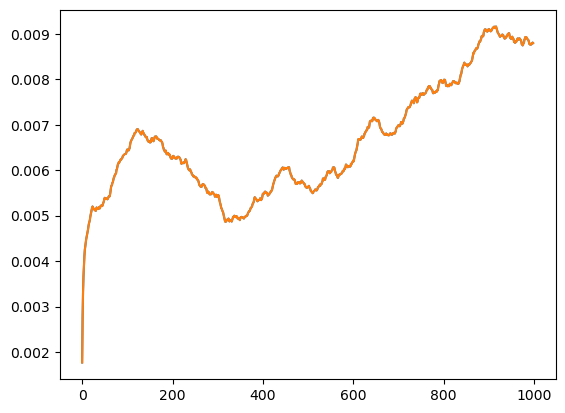

In [99]:
from utils import compute_R

date05=pd.Timestamp(2010,5,5)
events_05=events[events.index.date==date05.date()]

R_05=compute_R(events_05)
R_05_fast= compute_R_fast(events_05)[1:] ## remove first element to match length

plt.plot(R_05,label="05")
plt.plot(R_05_fast,label="05_fast")
